In [1]:
!pip install torch torchvision transformers

In [2]:
from transformers import DetrForObjectDetection, DetrImageProcessor
import torch

# the DETR-ResNet-101 model and processor
model = DetrForObjectDetection.from_pretrained("facebook/detr-resnet-101")
processor = DetrImageProcessor.from_pretrained("facebook/detr-resnet-101")

# evaluation 
model.eval()

config.json:   0%|          | 0.00/4.38k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/243M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/179M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-101 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/255 [00:00<?, ?B/s]

DetrForObjectDetection(
  (model): DetrModel(
    (backbone): DetrConvModel(
      (conv_encoder): DetrConvEncoder(
        (model): FeatureListNet(
          (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
          (bn1): DetrFrozenBatchNorm2d()
          (act1): ReLU(inplace=True)
          (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
          (layer1): Sequential(
            (0): Bottleneck(
              (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
              (bn1): DetrFrozenBatchNorm2d()
              (act1): ReLU(inplace=True)
              (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
              (bn2): DetrFrozenBatchNorm2d()
              (drop_block): Identity()
              (act2): ReLU(inplace=True)
              (aa): Identity()
              (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      

## Preprocessing the input images

In [13]:
# object detection with our model
with torch.no_grad():
    outputs = model(**inputs)

# Post-process the outputs
target_sizes = torch.tensor([image.size[::-1]])  # [height, width]
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.5)[0]

In [14]:
from PIL import Image
import requests
from io import BytesIO

# image
url = "https://cdn.britannica.com/79/232779-050-6B0411D7/German-Shepherd-dog-Alsatian.jpg"

# Fetch image data 
response = requests.get(url)
if response.status_code == 200:  
    image = Image.open(BytesIO(response.content))
    image.show()  
else:
    print("Failed to download image, status code:", response.status_code)

# Preprocess the image
inputs = processor(images=image, return_tensors="pt")



## Perform Object Detection

In [15]:
# Perform object detection
with torch.no_grad():
    outputs = model(**inputs)

# Post-process the outputs
target_sizes = torch.tensor([image.size[::-1]])  # [height, width]
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes, threshold=0.5)[0]

## Extracting our results

In [18]:
# detection results
boxes = results["boxes"].tolist()
scores = results["scores"].tolist()
labels = results["labels"].tolist()

# Map class IDs to class names
class_names = model.config.id2label

# Print the result
for box, score, label in zip(boxes, scores, labels):
    print(f"Detected {class_names[label]} with confidence {round(score, 3)} at location {box}")

Detected dog with confidence 0.999 at location [128.11441040039062, 64.42133331298828, 1344.43017578125, 998.3990478515625]


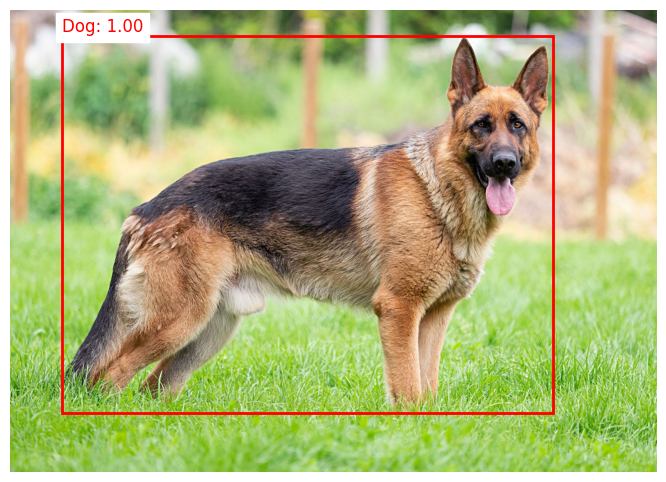

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# to bounding box format 
x_min, y_min, x_max, y_max = results["boxes"][0].tolist()
box_width, box_height = x_max - x_min, y_max - y_min

# figure and axes
fig, ax = plt.subplots(1, figsize=(10, 6))
ax.imshow(image)

# Draw bounding box
rect = patches.Rectangle(
    (x_min, y_min), box_width, box_height,
    linewidth=2, edgecolor="red", facecolor="none"
)
ax.add_patch(rect)

# label
ax.text(
    x_min, y_min - 10, f"Dog: {results['scores'][0].item():.2f}",
    fontsize=12, color="red", backgroundcolor="white"
)

# the image with the bounding box i specified
plt.axis("off")
plt.show()
